<a href="https://colab.research.google.com/github/tjdux/basic_of_ml/blob/main/25_%ED%8C%A8%EC%85%98_%EC%83%81%ED%92%88_%EC%9D%B4%EB%AF%B8%EC%A7%80_%EB%B6%84%EB%A5%98%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LeNet 모델 만들기

### 활성화 함수 - 시그모이드, 렐루
- 활성화 함수(activation function)
  - 뉴런의 출력 값 변형
  - 뉴런: 선형 변환을 적용
  - 활성화 함수: **비선형 변환**을 수행


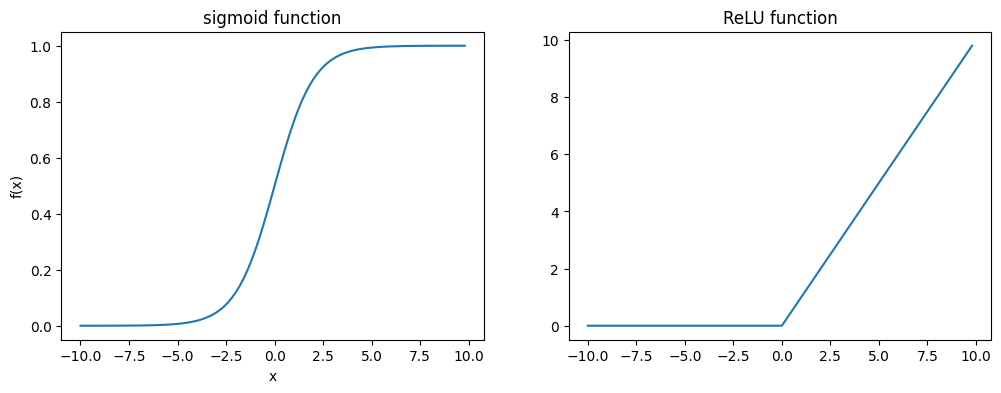

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit

x = np.arange(-10, 10, 0.2)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].plot(x, expit(x))
axs[0].set_title("sigmoid function")
axs[1].plot(x, x.clip(0))
axs[1].set_title("ReLU function")

for i in range(1):
  axs[i].set_xlabel("x")
  axs[i].set_ylabel("f(x)")

plt.show()

### LeNet-5 모델 만들기

In [3]:
import keras
from keras import layers

lenet5 = keras.Sequential()

lenet5.add(layers.Input(shape=(28, 28, 1)))

lenet5.add(layers.Conv2D(filters=6, kernel_size=5, activation="sigmoid",
                         padding="same"))
lenet5.add(layers.AveragePooling2D(pool_size=2))
lenet5.add(layers.Conv2D(filters=16, kernel_size=5, activation="sigmoid"))
lenet5.add(layers.AveragePooling2D(pool_size=2))

lenet5.add(layers.Flatten())

lenet5.add(layers.Dense(120, activation="sigmoid"))
lenet5.add(layers.Dense(84, activation="sigmoid"))
lenet5.add(layers.Dense(10, activation="softmax"))

## LeNet 모델 훈련하기

In [4]:
lenet5.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 10, 10, 16)     │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 5, 5, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        48,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,706 (241.04 KB)

 Trainable params: 61,706 (241.04 KB)

 Non-trainable params: 0 (0.00 B)

### 훈련 데이터 준비하기

In [5]:
# 데이터 로드
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
print(f"타깃값: {train_target}")
print(f"train_input shape: {train_input.shape}")
print(f"train_target shape: {train_target.shape}")

타깃값: [9 0 0 ... 3 0 5]
train_input shape: (60000, 28, 28)
train_target shape: (60000,)


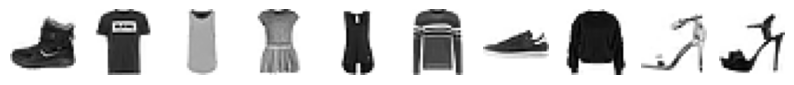

In [8]:
# 데이터 확인
fig, axs = plt.subplots(1, 10, figsize=(10, 10))

for i in range(10):
  axs[i].imshow(train_input[i], cmap="gray_r")
  axs[i].axis("off")

plt.show()

In [9]:
# 마지막 차원 추가, 정규화
train_input = train_input.reshape(-1, 28, 28, 1) / 255.0

In [10]:
# 훈련 세트 / 검증 세트 나누기
from sklearn.model_selection import train_test_split

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42
)

### 모델 훈련하기

In [11]:
# 콜백 정의
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    'lenet5-model.keras', save_best_only=True
)
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=2, restore_best_weights=True
)

In [12]:
# 컴파일
lenet5.compile(loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [13]:
# 훈련
hist = lenet5.fit(train_scaled, train_target, epochs=20,
                  validation_data=[val_scaled, val_target],
                  callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.4280 - loss: 1.5456 - val_accuracy: 0.7213 - val_loss: 0.7012
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.7404 - loss: 0.6720 - val_accuracy: 0.7580 - val_loss: 0.6154
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 25ms/step - accuracy: 0.7715 - loss: 0.5902 - val_accuracy: 0.7879 - val_loss: 0.5661
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - accuracy: 0.7996 - loss: 0.5257 - val_accuracy: 0.8183 - val_loss: 0.4889
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.8198 - loss: 0.4809 - val_accuracy: 0.8378 - val_loss: 0.4457
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.8335 - loss: 0.4428 - val_accuracy: 0.8447 - val_loss: 0.4272
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 37s 25ms/step - accuracy: 0.8475 - loss: 0.4127 - val_accuracy: 0.8518 - val_loss: 0.4023
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 24ms/step - accuracy: 0.8521 -

### 모델 성능 확인하기

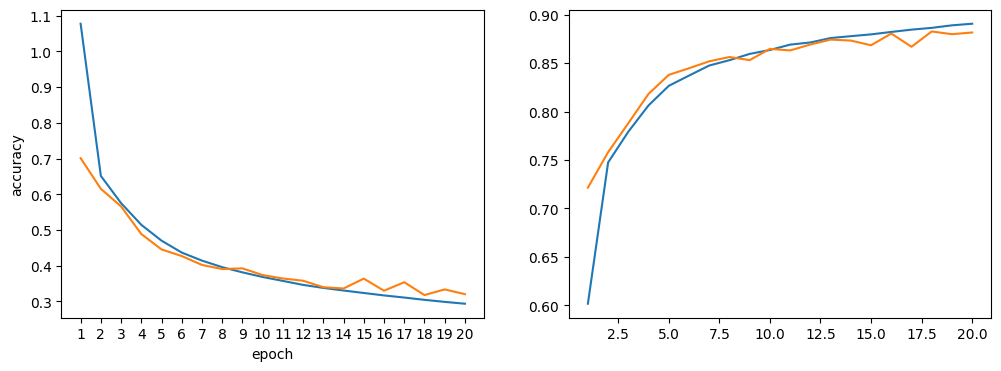

In [15]:
epochs = range(1, len(hist.history['loss'])+1)

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

axs[0].plot(epochs, hist.history["loss"])
axs[0].plot(epochs, hist.history["val_loss"])
axs[0].set_ylabel("loss")

axs[1].plot(epochs, hist.history["accuracy"])
axs[1].plot(epochs, hist.history['val_accuracy'])
axs[0].set_ylabel("accuracy")

for i in range(1):
  axs[i].set_xticks(epochs)
  axs[i].set_xlabel("epoch")

plt.show()